<a href="https://colab.research.google.com/github/AI-public/Back-to-Basics-Autoencoder/blob/main/TRAFFIC_SIGN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#downloading the data and unzipping it:

!gdown https://drive.google.com/uc?id=1wAEwM1k66AAYHPtVFwPjXyCm4LOm5Wjg
!unzip archive.zip

In [ ]:
#resizing and saving imges in B&W

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
dsize = (64,64)

images = []

for i in range(0,43):

  folder='train/'+str(i)+'/'
  for filename in os.listdir(folder):
      img = cv2.resize(cv2.imread(os.path.join(folder,filename),0), dsize).reshape(64*64)
      img=(np.concatenate(([i],img)))
      if img is not None:
          images.append(img)

  
all_images_GT=np.array(images)

In [ ]:
print(all_images_GT[:,0])

[ 0  0  0 ... 42 42 42]


9


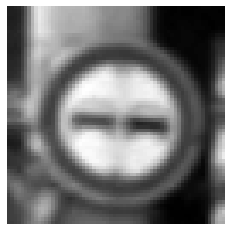

In [ ]:
#Checking the image's extraction went well...

#np.shape(all_images_GT) (39209, 4097)
#Must be run ONLY ONCE to ensure 'testing' data is NEVER made available to the ANN
##################################################
#np.random.shuffle(all_images_GT) 
#np.save('all_train_dat',all_images_GT)
##################################################


all_images_GT=np.load('all_train_dat.npy')

train_x=all_images_GT[10000:,:]
test_x=all_images_GT[:10000,:]
#Testing 1..2..3
image_id=9
plt.figure()
plt.axis('off')
plt.imshow(train_x[image_id,1:].reshape(64,64), interpolation='none', cmap='gray')
print(train_x[image_id,0])
plt.show()

In [ ]:
# medium model 169,083 params.
from __future__ import print_function
import numpy as np
import cv2
import keras
import numpy as np
from keras.models import Model
from keras.optimizers import RMSprop,SGD
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from keras.layers import Activation,Dropout,Input,Conv2D,MaxPooling2D,UpSampling2D,AveragePooling2D,Conv1D,Reshape,Flatten,BatchNormalization
from keras.utils import to_categorical
from keras.layers import LeakyReLU
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv2D(20, (5, 5), padding="same",input_shape = (64,64,1)))
model.add(Activation(LeakyReLU(alpha=0.1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(40, (5, 5), padding="same"))
model.add(Activation(LeakyReLU(alpha=0.1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(40, (5, 5), padding="same"))
model.add(Activation(LeakyReLU(alpha=0.1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(40, (5, 5), padding="same"))
model.add(Activation(LeakyReLU(alpha=0.1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(43, activation='softmax'))


model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

filepath="model.hdf5" #val_accuracy = 0.99910/// val!=test
model.load_weights("model.hdf5")

#use model.predict(...)



In [ ]:
#  small model 89,003 params.
from __future__ import print_function
import numpy as np
import cv2
import keras
import numpy as np
from keras.models import Model
from keras.optimizers import RMSprop,SGD
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from keras.layers import Activation,Dropout,Input,Conv2D,MaxPooling2D,UpSampling2D,AveragePooling2D,Conv1D,Reshape,Flatten,BatchNormalization
from keras.utils import to_categorical
from keras.layers import LeakyReLU
from keras.models import load_model
from keras.callbacks import ModelCheckpoint




model = Sequential()
model.add(Conv2D(20, (5, 5), padding="same",input_shape = (64,64,1)))
model.add(Activation(LeakyReLU(alpha=0.1)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3)))
model.add(Conv2D(40, (5, 5), padding="same"))
model.add(Activation(LeakyReLU(alpha=0.1)))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5)))
model.add(Flatten())
model.add(Dense(100, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(43, activation='softmax'))





model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

filepath="model_s.hdf5" #val_accuracy improved from 0.99330 to 0.99360, saving model to model_s.hdf5
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.load_weights("model_s.hdf5")



In [ ]:
# Very small model 29,123 params.

from __future__ import print_function
import numpy as np
import cv2
import keras
from keras import regularizers
import numpy as np
from keras.models import Model
from keras.optimizers import RMSprop,SGD
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from keras.layers import Activation,Dropout,Input,Conv2D,MaxPooling2D,UpSampling2D,AveragePooling2D,Conv1D,Reshape,Flatten,BatchNormalization
from keras.utils import to_categorical
from keras.layers import LeakyReLU
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Conv2D(20, (5, 5), padding="same",input_shape = (64,64,1)))
model.add(Activation(LeakyReLU(alpha=0.1)))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5)))
model.add(Conv2D(40, (3, 3), padding="same"))
model.add(Activation(LeakyReLU(alpha=0.1)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(3,3 )))
model.add(Conv2D(40, (3, 3), padding="same"))
model.add(Activation(LeakyReLU(alpha=0.1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(43, activation='softmax'))





model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

filepath="model_xs.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.load_weights("model_s.hdf5")#val_accuracy improved from 0.98390 to 0.98520, saving model to model_xs.hdf5



